MNIST data set are usually first peferred while learning the classification models.
This dataset is often used by the data scientist during learning phase to get their hands on over classification model.

In [1]:
#importing required libraries

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
import matplotlib as mlt

In [4]:
import matplotlib.pyplot as plt

In [5]:
#To fetch the data set

In [6]:
mnist = fetch_openml('mnist_784',version=1)

In [7]:
#To get all the keys present in the dictonary above

mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
len(mnist['data']), len(mnist['target'])

(70000, 70000)

In [9]:
## Determining the shape of the data 

x,y = mnist['data'], mnist['target']
x.shape, y.shape


((70000, 784), (70000,))

This data set contains 70000 instances i.e 70000 handwritten images in it where each image is represented by 784 features.
<br>Here 784 features means that each image is of 28 * 28 pickels and the value range for these pickels is between 0(white) to 255(black) value.<br>
Let's consider one instance from the data set and represent it using Matplotlib imshow() function.
We know that images are represented as x * x pixel, so now we will convert this 784 fetaures to represent it in image form.<br>
So now we can divide 784 as 28 * 28 pixels

In [10]:
image_instance = x[0]

In [11]:
# Checking the shape of the instance x[0]
image_instance.shape

(784,)

In [12]:
# Reshaping the shape of the instance

image_instance_reshape = image_instance.reshape(28,28)

In [13]:
# Getting the shape of the reshaped image

image_instance_reshape.shape

(28, 28)

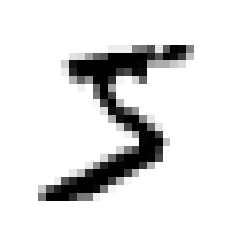

In [14]:
# Now let's display this using matplotlib

plt.imshow(image_instance_reshape,cmap=plt.cm.binary,interpolation='nearest')
plt.axis("off")
plt.show()

In [15]:
# Let's check the output of the instance which we have plotted above

y[0]

'5'

In [16]:
# Since the result is in the string form as seen above we will typecast it to integer.

y = y.astype(np.uint8)

<IPython.core.display.Javascript object>

In [17]:
# Let's check the label now

y[0]

5

In [18]:
# Before we go more closer to inspect the data we will first seggregate the training and the testing data.
# One great advantage of this dataset is that it has already 60000 instances for training and remaining 10000 instances for testing.

x_train,x_test,y_train,y_test = x[:60000], x[60000:], y[:60000],y[60000:]

The training set is already shuffled for us, which is good as this guarantees that all 
cross-validation folds will be similar (you don’t want one fold to be missing some digits).

<h5>Now Let's build binary classifier

In [19]:
#For now let's develop a model which is able to atleast classify one digit i.e we will create a model and call it as 5-detector

In [20]:
# As we are developing the 5-detector, let's create a target vector for this classification task.
# Here the value of target vector is classifed as True or false base on the condition == 5.

y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [21]:
# Now let's pick some classifier to train the model
# We will use Stochastic Gradient Descent(SGD) classifier, using Scikit-Learn’s SGDClassifier class

In [22]:
# import SGDClassifier from sckit-learn

from sklearn.linear_model import SGDClassifier

In [23]:
sgdf_clf = SGDClassifier(random_state=42)

In [24]:
sgdf_clf.fit(x_train,y_train_5)

SGDClassifier(random_state=42)

In [25]:
# Now let's check the prediction made by the model

sgdf_clf.predict(image_instance.reshape(1,-1))

array([ True])

<h4> Performance Measures

In [26]:
# Now after the model is trained let's check the performance of the model to check the accuracy obtained.

In [27]:
# Lets implement the performance of the model using the cross validation technique. 
# Sckit-learn provides the cross_val_score() function for cross validation score.
# But we can implement our own straight forward cross_val_score() function for us which can evaluate the score of the model.

In [28]:
# implementing own cross validator

In [29]:
from sklearn.model_selection import StratifiedKFold

In [30]:
from sklearn.base import clone

In [31]:
skfolds = StratifiedKFold(n_splits=3,random_state=42)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


In [32]:
accuracy = []
for train_index, test_index in skfolds.split(x_train,y_train_5):
    clone_clf = clone(sgdf_clf)
    x_train_fold = x_train[train_index]
    y_train_fold = y_train_5[train_index]
    x_test_fold = x_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(x_train_fold,y_train_fold)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred==y_test_fold)
    accuracy.append(n_correct/len(y_pred))

In [33]:
accuracy

[0.95035, 0.96035, 0.9604]

In [34]:
# using sckit-learn cross_val_score()

In [35]:
from sklearn.model_selection import cross_val_score

In [36]:
cross_val_score(sgdf_clf,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [37]:
# Wow!!! Isn't it amazing to get accuracy above 95%. But wait it might not be the same if we increase the fold value.

In [38]:
# Let us just construct a model which will always predict "not-5" as an output

In [39]:
from sklearn.base import BaseEstimator

In [40]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, x):
        return np.zeros((len(x),1),dtype=bool)

In [41]:
never_5_Clf = Never5Classifier()

In [42]:
cross_val_score(never_5_Clf,x_train,y_train_5,cv=3,scoring= 'accuracy')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([0.91125, 0.90855, 0.90915])

Now considering the above example we would think that the accuracy is 90% and it means 10% of data have 5. But the thought here will be incorrect because this data is skewed dataset (i.e while predicting we have the values predict all as 0). For this reason we do not use accuracy as the performance measure for the classification model.

In [43]:
# Confusion matrix

In [44]:
# Much better way to evaluate the classification model is the confusion matrix.
# Where in we try to evaluate how much prediction were made as False inspite of being True or viceversa.

# To generate the confusion matrix we require set of prediction to be done and then later this set of prediction will be used
# to compare with the actual target.

# We will use cross_val_predict() function provided by sklearn, which is used to predict the result of the provided input.

In [45]:
from sklearn.model_selection import cross_val_predict

In [46]:
y_train_prediction = cross_val_predict(sgdf_clf,x_train,y_train_5,cv=3)

In [47]:
# Just like cross_val_score(), cross_val_predict() also performs KFold cross validation,
# but instead of returning the accuracy score it returns the actual predicted values made on each fold.

# This also means that the prediction are clean for each training set.
# ("clean" meaning that the prediction are made on the data which are never seen by the model during training)

In [48]:
# Let's now generate the confusion matrix using confusion_matrix()

In [49]:
from sklearn.metrics import confusion_matrix

In [50]:
confusion_matrix = confusion_matrix(y_train_5,y_train_prediction)

In [51]:
confusion_matrix

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [52]:
# Each row in the above confusion matrix represents the actual class while each column represents the predicted class.

# first element from the first row of the matrix represent the true negative (TN) element
#    i.e target values for those instances were false and our model have also predicted it as false,
# the second element of the first row is false positive (FP)
#    i.e these instances had target output as false but were predicted to be true.
# first element from the second row is false negative(FN).
#    i.e these instances had targer=t value as true but were predicted as false.
# second element of second row is True positive (TP)
#    i.e these instances had predicted and actual result as true.


In [53]:
# A perfect classifier model will onlt have true positives and true negatives there won't be any miss predictions so the
# value for the false positive and false negative will always be 0.

# Let's have a practical implementation of above scenario.

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
y_predict_perfect = y_train_5

In [56]:
confusion_matrix_perfect = confusion_matrix(y_train_5,y_predict_perfect)

In [57]:
confusion_matrix_perfect

array([[54579,     0],
       [    0,  5421]], dtype=int64)

In [58]:
# From above confusion matrix we are able gain much more insights.

# But we would always prefer to go with the more concise metrics. 
# Interestingly, we do have some precise metrics which we will consider at the most after confusion matrix.

# One of the metric is precision of the classifier, which gives the accuracy of positive predictions.

# Formulatically it is represented as :

#            Precision = True Positive(TP) / (True Positive(TP) + False Positive(FP))


In [59]:
# There is one more important metrics of classification model called as recall or sensitivity or true positive rate(TPR)

# this is the ratio of positive instances that are correctly detected by the classifier

# Formulatically it is represented as :

#    Recall = True Positive(TP) / True Positive(TP) + False Negative(FN)

In [60]:
# Sckit- Learn provides multiple metrics function including precision and recall.

In [61]:
from sklearn.metrics import precision_score, recall_score

In [62]:
precision_score(y_train_5,y_train_prediction)

0.8370879772350012

In [63]:
recall_score(y_train_5,y_train_prediction)

0.6511713705958311

In [64]:
# From the above score we can now conclude that our model is not that good as compared to accuracy given by cross-val_score()

# Now if we look at our precision_score we can make out that our model's while making prediction is only 83.7% correct.
# and 65.11% of the instances are classified properly based on recall_score obtained.

In [65]:
# We often combine precision and recall together and the combination is called as F1 score.

# F1 score is "harmonim mean" of precision and recall.

# Regular mean give equal weightage to all numbers where as harmonic mean gives more weightage to low values.
# As a result, the classifier will only get a high F1 score if both recall and precision are high.

# Formulatically it is represented as :

#  F1 score = 2 / [(1/precision) + (1/recall)] = 2 * (precision * recall) / (precision + recall) = TP / TP + ((FN+FP)/2)

In [66]:
# To compute f1 score directly, sklearn provide f1_score() function. Let's implement and check 

In [67]:
from sklearn.metrics import f1_score

In [68]:
f1_score = f1_score(y_train_5,y_train_prediction)

In [69]:
f1_score

0.7325171197343846

In [70]:
# About the F1 Score:

# F1 score favours classifier if both the precision and the recall score are similar.
# And this favorness can not always benefit us,
# because we could have scenarios where either precision or recall should be given more priority.

# Eg. A video detector for kids we would try to keep high precision of the classifier so that it can avoid all irrelevant videos
# which ultimately lower's the recall value.
# On the other hand,suppose you train a classifier to detect shoplifters on surveillance images: 
# it is probably fine if your classifier has only 30% precision as long as it has 99% recall
# (sure, the security guards will get a few false alerts, but almost all shoplifters will get caught).

In [71]:
# You can’t have it both ways: increasing precision reduces recall, and vice versa. This is called the precision/recall tradeoff

In [72]:
# Precision recall tradeoff:

# Skict learn does not let you set the threshold value directly but provides you a decision_function() method, 
# which returns a score for each instance, and then make predictions based on those scores using any threshold value you want.

In [73]:
y_scores = sgdf_clf.decision_function(image_instance.reshape(1,-1))

In [74]:
y_scores

array([2164.22030239])

In [75]:
threshold = 0

In [76]:
y_image_instance_predict = (y_scores > threshold)

In [77]:
y_image_instance_predict

array([ True])

In [78]:
# The SGDClassifier uses a threshold equal to 0, so the previous code returns the same
# result as the predict() method (i.e., True). Let’s raise the threshold:

In [79]:
threshold = 8000

In [80]:
y_image_instance_predict = (y_scores > threshold)

In [81]:
y_image_instance_predict

array([False])

In [82]:
# This confirms that raising the threshold decreases recall.

# To know which threshold is to be used, 
# you will first need to get the scores of all instances in the training set using the cross_val_predict() function again,
# but this time specifying that you want it to return decision scores instead of predictions

In [83]:
y_scores = cross_val_predict(sgdf_clf, x_train, y_train_5, cv=3, method='decision_function')

In [84]:
# Now with these scores you can compute precision and recall for all possible thresholds 
# using the precision_recall_curve() function:

In [85]:
from sklearn.metrics import precision_recall_curve

In [86]:
precision, recall, threshold = precision_recall_curve(y_train_5,y_scores)

In [87]:
precision

array([0.09040123, 0.09038606, 0.09038757, ..., 1.        , 1.        ,
       1.        ])

In [88]:
recall

array([1.00000000e+00, 9.99815532e-01, 9.99815532e-01, ...,
       3.68935621e-04, 1.84467810e-04, 0.00000000e+00])

In [89]:
threshold

array([-106527.45300471, -105763.22240074, -105406.2965229 , ...,
         38871.26391927,   42216.05562787,   49441.43765905])

In [90]:
# Now that you have your precision, recall and threshold values ready. 
#Let represents these graphically indicating the function of threshold using matplotlib

In [91]:
def plot_precision_recall_vs_threshold(threshold, precision, recall):
    plt.figure(figsize=(15,7))
    plt.plot(threshold, precision[:-1], 'b--', label = "Precision")
    plt.plot(threshold, recall[:-1],'g-', label="Recall")
    plt.xlabel("Threshold")
    plt.legend()

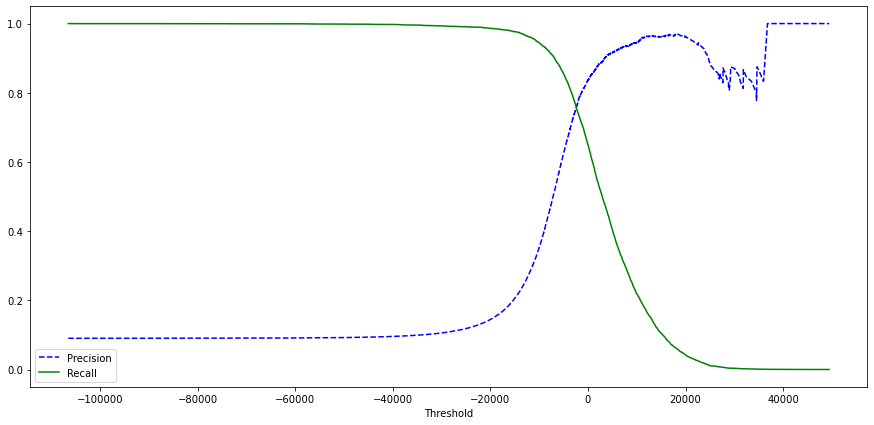

In [92]:
plot_precision_recall_vs_threshold(threshold, precision, recall)
plt.show()

In [94]:
threshold_90_precision = threshold[np.argmax(precision>=0.90)]

<IPython.core.display.Javascript object>

In [95]:
threshold_90_precision

3370.0194991439557

In [96]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [97]:
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [98]:
precision_score(y_train_5,y_train_pred_90)

0.9000345901072293

In [99]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

In [101]:
# A high-precision classifier is not very useful if its recall is too low!

# If someone says “let’s reach 99% precision,” you should ask, “at what recall?”

In [102]:
# The ROC Curve

# The receiver operating characteristics(ROC) is commonly used for binary classifier.

# This is similar to precision/recall curve but instead plots precision vs recall.
# ROC curve plots true positive rate i.e recall against False positive rate.
# The FPR is the ratio of negative instances that are incorrectly classified as positive.
# It is equal to one minus the true negative rate,
# which is the ratio of negative instances that are correctly classified as negative.
# The TNR is also called specificity.
# Hence the ROC curve plots sensitivity (recall) versus 1 – specificity.

In [103]:
# To plot the ROC curve we need to calculate the TPR and the FPR, we will be using roc_curve()

In [104]:
from sklearn.metrics import roc_curve

In [105]:
fpr, tpr, thresholds = roc_curve(y_train_5,y_scores)

In [107]:
fpr, tpr, thresholds

(array([0.        , 0.        , 0.        , ..., 0.99937705, 0.99937705,
        1.        ]),
 array([0.00000000e+00, 1.84467810e-04, 9.22339052e-04, ...,
        9.99815532e-01, 1.00000000e+00, 1.00000000e+00]),
 array([  49442.43765905,   49441.43765905,   36801.60697028, ...,
        -105763.22240074, -106527.45300471, -146348.56726174]))

In [108]:
# To understand it more clearly lets plot the FPR against TPR using matplotlb

In [130]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,label=label)
    plt.plot([0,1],[0,1])
    plt.xlabel(label[1])
    plt.ylabel(label[0])

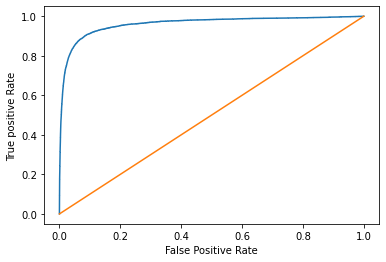

In [131]:
plot_roc_curve(fpr,tpr,label=("True positive Rate","False Positive Rate"))
plt.show()

In [132]:
# the higher the recall (TPR), the more false positives (FPR) the classifier produces.

# One way to compare classifiers is to measure the area under the curve (AUC).
# A perfect classifier will have a ROC AUC equal to 1,
# whereas a purely random classifier will have a ROC AUC equal to 0.5.

In [133]:
# Let's compute the AUC score of above metrics

In [134]:
from sklearn.metrics import roc_auc_score

In [135]:
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

In [136]:
# Let’s train a RandomForestClassifier and compare its ROC curve and ROC AUC score to the SGDClassifier.

In [137]:
from sklearn.ensemble import RandomForestClassifier

In [138]:
forest_clf = RandomForestClassifier(random_state=42)

In [140]:
y_probas_scores = cross_val_predict(forest_clf,x_train,y_train_5,cv=3,method='predict_proba')

In [141]:
# But to plot a ROC curve, you need scores, not probabilities.


In [142]:
y_scores_forest = y_probas_scores[:,1]

In [144]:
fpr_forest, tpr_forest, thresholds = roc_curve(y_train_5,y_scores_forest)

In [147]:
# Plotting SGD and Random Forest roc curves

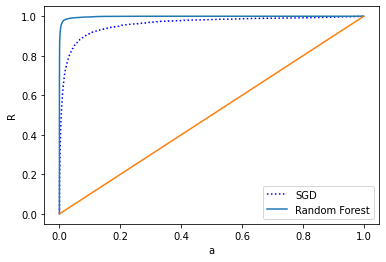

In [146]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [148]:
# ROC AUC curve of random forest classifier

In [149]:
roc_auc_score(y_train_5,y_scores_forest)

0.9983436731328145